# Compare Two Samples by Bootstrapping
## Mini-Lab: Bootstrapping and Confidence Intervals

Welcome to your next mini-lab! Go ahead an run the following cell to get started. You can do that by clicking on the cell and then clickcing `Run` on the top bar. You can also just press `Shift` + `Enter` to run the cell.

In [1]:
from datascience import *
import numpy as np
import otter

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

grader = otter.Notebook("m8_l1_tests")

After Blockeley University's analysis from the previous lab, news came out that the village received faulty test kits that had higher than average false negative rates. Since testing so many individuals takes time, Blockeley researchers decided to use data science to figure out what the true percentage of infected individuals in this village is. This village has already started retesting but is far behind other neighboring villages.

As a Blockeley data scientist, you decide to take matters into your own hands and try to estimate the true proportion. We'll start with importing the new test data by running the next cell.

In [2]:
new_tests = Table().read_table("../datasets/new_covid19_village_tests.csv")
new_tests.show(5)

COVID-19 Test Result
negative
positive
negative
negative
negative


Bootstapping is similar to hypothesis testing in that we will need a function to sample these tables, a function to calculate the proportion, and a function to apply this test statistic to our resampled tables. In the following cell, go ahead and create (or re-create) those functions. Keep in mind that `sample_population` is different from the previous mini-lab! Other than `sample_population`, the other two functions should be the same to the previous mini-lab so feel free to copy and paste your answers from the previous mini-lab onto this lab.

For the `sample_population` function, the output should have the same number of rows as the input table. You can get the number of rows from the table by attaching `.num_rows` to the end of your table. For example, `test_table.num_rows` will return the number of rows for `test_table`.

*Note*: Don't forget that we want the `with_replacement` parameter to be `True` now!

In [22]:
new_tests.column(0) == "positive"

array([False,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False,  True,
       False,  True, False,  True, False,  True, False,  True,  True,
        True,  True,  True, False,  True,  True, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True,  True, False,  True, False,  True, False, False,  True,
        True, False, False, False, False, False,  True, False,  True,
       False, False,

In [25]:
def proportion_positive(test_results):
    numerator = np.count_nonzero(test_results == "positive")
    denominator = len(test_results)
    return numerator / denominator


def sample_population(population_table):
    sampled_population = population_table.sample()
    return sampled_population


def apply_statistic(sample_table, column_name, statistic_function):
    return statistic_function(sample_table.column(column_name))

In [ ]:
grader.check("q1")

Now that we have our helper functions, we can go ahead and create the `boostrap` function which will run through one full bootstrap simulation. Go ahead and finish this function in the following cell.

This `bootstrap` function takes in a `sample_table`, a `column_name`, and a `statistic_function`. This `sample_table` is the table containing the samples that we will bootstrap from whereas the `column_name` is the column in which we will apply our `statistic_function` function to. This function will return the test statistic of the newly resampled table.

In [9]:
def bootstrap(sample_table, column_name, test_statistic):
    resampled_table = sample_table.sample()
    return apply_statistic(resampled_table, column_name, test_statistic)

In [ ]:
grader.check("q2")

Now that this `bootstrap` function is complete, let's run through a full bootstrap method! In the following cell is a completed for-loop that is missing the `iterations` parameter. Go ahead and fill in this parameter and run the cell. Keep in mind that for the Law of Large Numbers to take effect, you will need a sufficiently large `iterations` count.

In [27]:
# Simulation code below. Fill out this portion!

iterations = 10000
bootstrap_samples = make_array()

for iteration in np.arange(iterations):
    bootstrap_result = bootstrap(new_tests, "COVID-19 Test Result", proportion_positive)
    bootstrap_samples = np.append(bootstrap_samples, bootstrap_result)
    
bootstrap_samples

array([0.25287356, 0.26724138, 0.23850575, ..., 0.27298851, 0.32758621,
       0.32471264])

The last thing the we would want to do is to create a confidence interval from our data to gauge if we captured the true proportion of COVID-19 cases. The final cell in this lab will print out the confidence interval for you data! It will also graph your bootstrap distribution as well as your corresponding confidence interval. Don't forget to replace `CI` with your confidnce interval value!

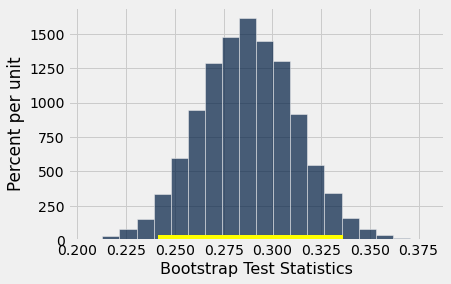

In [29]:
# Specify your confidence interval here!
CI = 95


# This code is to graph your bootsstrap data and where our confidence interval lies
# There's no need to fill anything out but it is good to understand what's going on!


left_bound = percentile((100 - CI) / 2, bootstrap_samples)
right_bound = percentile(((100 - CI) / 2) + CI, bootstrap_samples)

simulation_table = Table().with_column("Bootstrap Test Statistics", bootstrap_samples)
simulation_table.hist(bins=20)
plots.plot(make_array(left_bound, right_bound), make_array(0, 0), color="yellow", lw=10);

Congratulations on finishing! Run the next cell to make sure that you passed all of the test cases.

In [ ]:
grader.check_all()